In [1]:
import ROOT

Welcome to JupyROOT 6.20/02


In [2]:
!ls -ltr

total 8387
-rw-r--r--. 1 migordon 1399  15708 Aug 18  2020 TTto2L2Nu.txt
-rw-r--r--. 1 migordon 1399  41132 Aug 18  2020 TTToSemiLeptonic.txt
-rw-r--r--. 1 migordon 1399  14492 Aug 25  2020 Plots.pdf
-rw-r--r--. 1 migordon 1399  37773 Aug 27  2020 August26.pdf
-rw-r--r--. 1 migordon 1399  34610 Sep  2  2020 FTFunctions.cpp
-rw-r--r--. 1 migordon 1399   5774 Sep 21  2020 RealData
-rw-r--r--. 1 migordon 1399  45563 Sep 23  2020 September9.pdf
-rw-r--r--. 1 migordon 1399  45708 Sep 24  2020 September23MonteCarlo.pdf
-rw-r--r--. 1 migordon 1399  46111 Sep 24  2020 September23RealData.pdf
-rw-r--r--. 1 migordon 1399  48733 Oct  9  2020 October8MonteCarlo.pdf
-rw-r--r--. 1 migordon 1399    926 Oct 20  2020 graph.dot.pdf
-rw-r--r--. 1 migordon 1399 145577 Oct 20  2020 October15.pdf
-rw-r--r--. 1 migordon 1399  49188 Nov 11 21:52 October8RealData.pdf
-rw-r--r--. 1 migordon 1399 159946 Nov 23 23:04 November12.pdf
-rw-r--r--. 1 migordon 1399 159946 Nov 23 23:11 November23.pdf
-rw-r--r--. 1 migor

In [3]:
!mv Combination.root Combination.root_backup
!hadd -f Combination.root 2018_Mu_Data.root 2018_Mu_TTToSemiLeptonic.root 2018_Mu_TTTo2L2Nu.root

hadd Target file: Combination.root
hadd compression setting for all output: 1
hadd Source file 1: 2018_Mu_Data.root
hadd Source file 2: 2018_Mu_TTToSemiLeptonic.root
hadd Source file 3: 2018_Mu_TTTo2L2Nu.root
hadd Target path: Combination.root:/


In [4]:
f = ROOT.TFile.Open('Combination.root', 'read')
k = [ff.GetName() for ff in f.GetListOfKeys()]
print(k[0])

2018___Mu___Data___mu_pt___nominal


In [5]:
eras = list(set([kk.split("___")[0] for kk in k]))
channels = list(set([kk.split("___")[1] for kk in k]))
samples = list(set([kk.split("___")[2] for kk in k]))
variables = list(set([kk.split("___")[3] for kk in k]))
systematics = list(set([kk.split("___")[4] for kk in k]))

In [6]:
print(eras)
print(channels)
print(samples)
print(variables)
print(systematics)

['2018']
['Mu']
['TTTo2L2Nu', 'Data', 'TTToSemiLeptonic']
['jet1_eta', 'mu_phi', 'muon_pfRelIso03_chg', 'veto_mu_eta', 'veto_mu_phi', 'veto_mu_mass', 'muon_pfRelIso03_all', 'jet2_pt', 'jet2_phi', 'jet1_pt', 'mu_eta', 'veto_mu_pfRelIso03_all', 'veto_mu_pt', 'number_of_jets', 'ht', 'mu_pt', 'number_of_muons', 'jet_deep', 'missing_transverse_momentum', 'muon_pfRelIso04_all', 'jet2_eta', 'jet1_phi', 'transverse_mass']
['nominal']


In [7]:
def GetHistos(f, era, channel, variable, systematic = "nominal", separator = "___"):
    
    MC = dict()
    Data = dict()
    
    k = [ff.GetName() for ff in f.GetListOfKeys()]
    print(k)
    k = [kk for kk in k if era == kk.split(separator)[0]]
    k = [kk for kk in k if channel == kk.split(separator)[1]]
    k = [kk for kk in k if variable == kk.split(separator)[3]]
    k = [kk for kk in k if systematic == kk.split(separator)[4]]
    #print(k)
    
    for kk in k:
        sample = kk.split(separator)[2]
        
        if "data" in sample.lower():
            Data[sample] = f.Get(kk)
            
        else:
            MC[sample] = f.Get(kk)
            
    return MC, Data

In [8]:
x, y = GetHistos(f, "2018", "Mu", "jet1_eta")
print(x, y)

['2018___Mu___Data___mu_pt___nominal', '2018___Mu___Data___mu_eta___nominal', '2018___Mu___Data___mu_phi___nominal', '2018___Mu___Data___jet1_pt___nominal', '2018___Mu___Data___jet2_pt___nominal', '2018___Mu___Data___jet1_eta___nominal', '2018___Mu___Data___jet2_eta___nominal', '2018___Mu___Data___jet1_phi___nominal', '2018___Mu___Data___jet2_phi___nominal', '2018___Mu___Data___jet_deep___nominal', '2018___Mu___Data___number_of_jets___nominal', '2018___Mu___Data___number_of_muons___nominal', '2018___Mu___Data___transverse_mass___nominal', '2018___Mu___Data___missing_transverse_momentum___nominal', '2018___Mu___Data___ht___nominal', '2018___Mu___Data___muon_pfRelIso03_all___nominal', '2018___Mu___Data___muon_pfRelIso03_chg___nominal', '2018___Mu___Data___muon_pfRelIso04_all___nominal', '2018___Mu___TTToSemiLeptonic___mu_pt___nominal', '2018___Mu___TTToSemiLeptonic___mu_eta___nominal', '2018___Mu___TTToSemiLeptonic___mu_phi___nominal', '2018___Mu___TTToSemiLeptonic___jet1_pt___nominal', 

ReferenceError: attempt to access a null-pointer

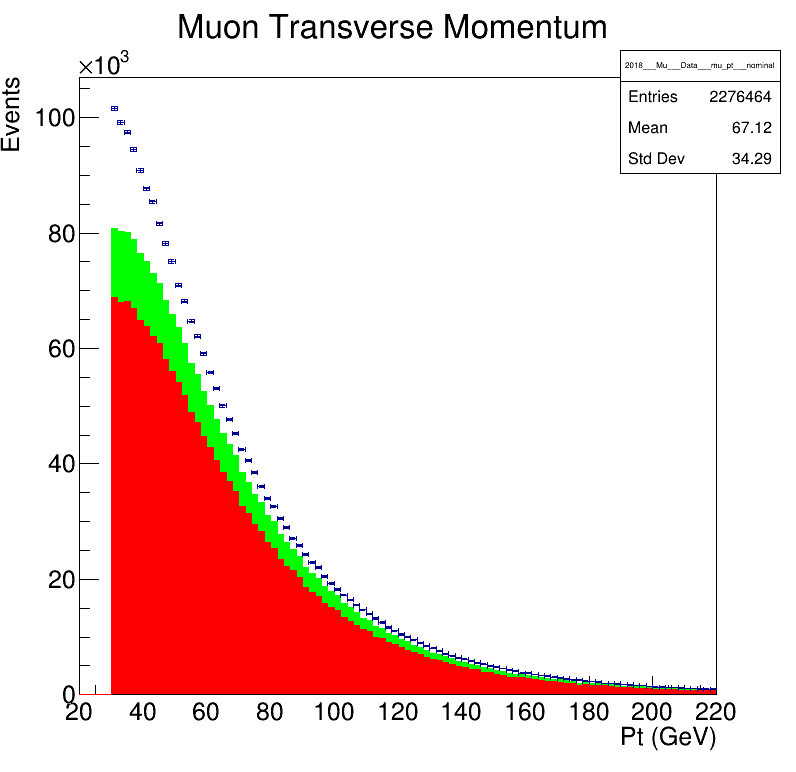

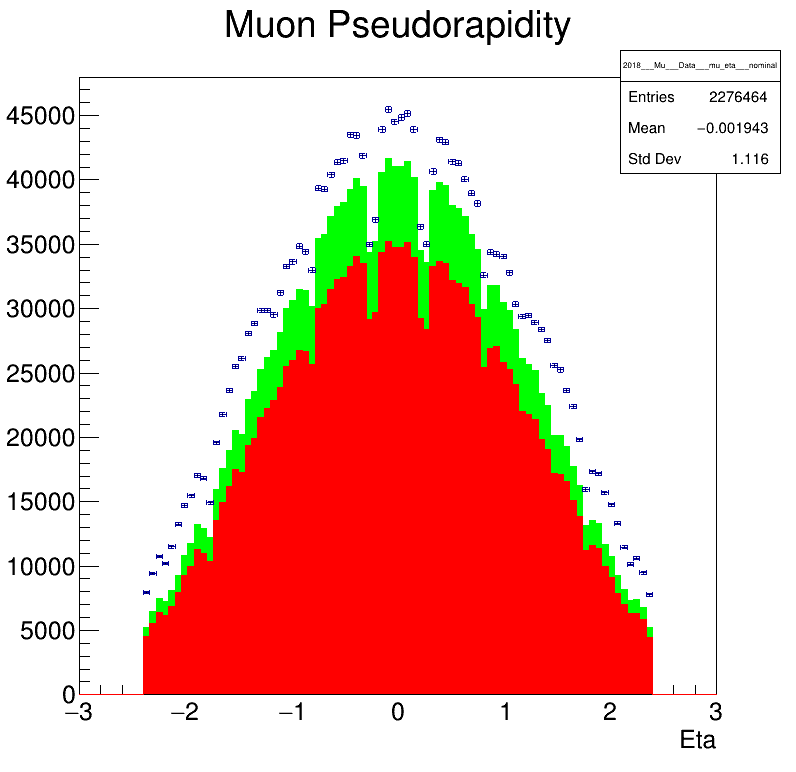

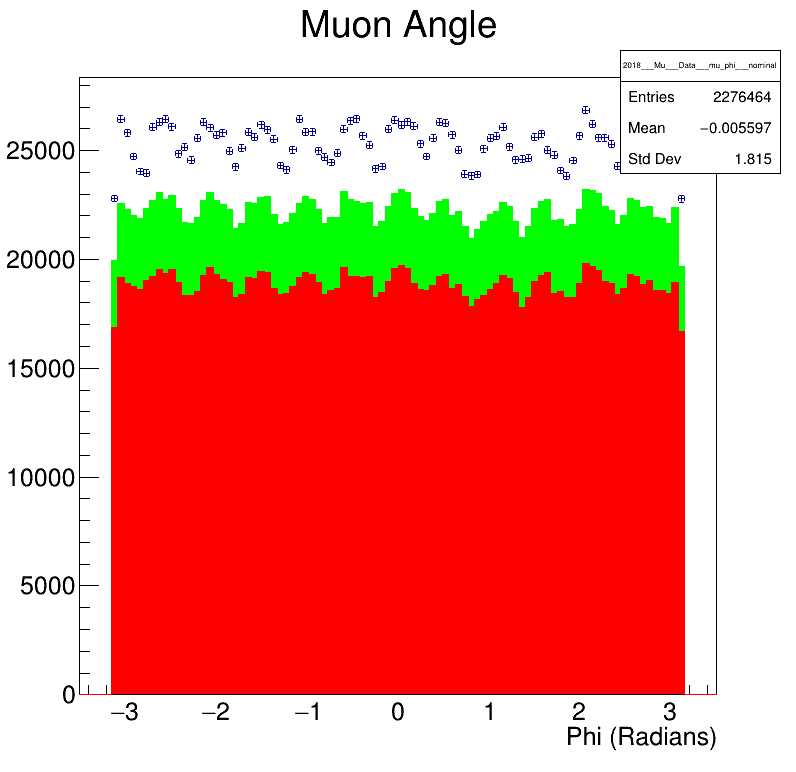

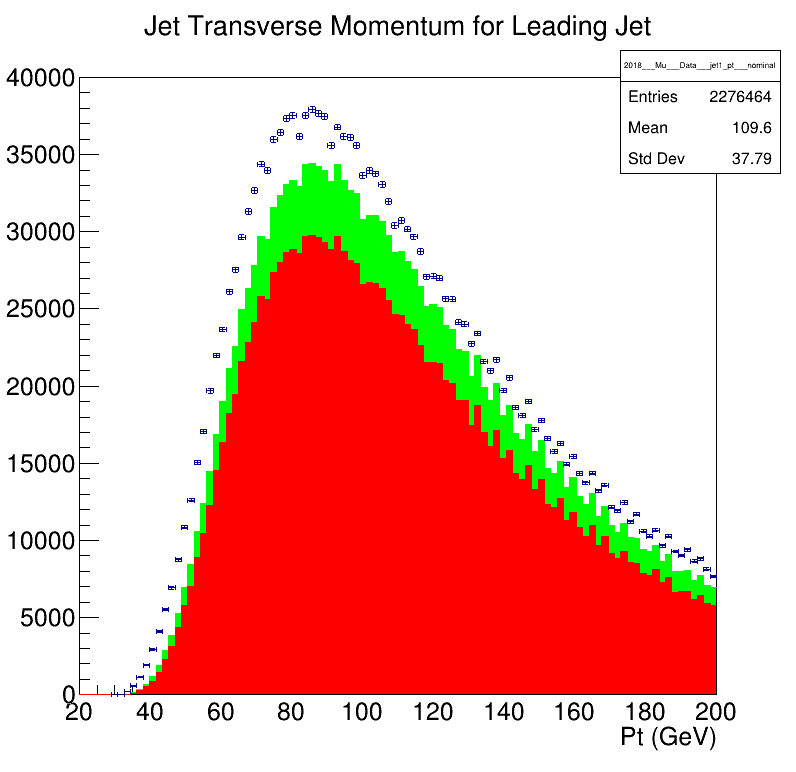

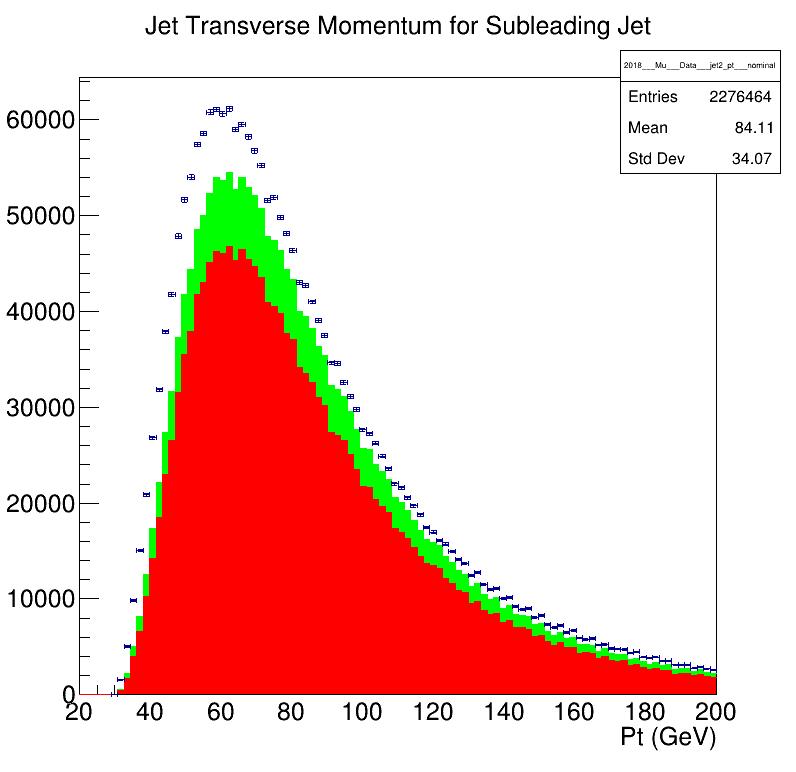

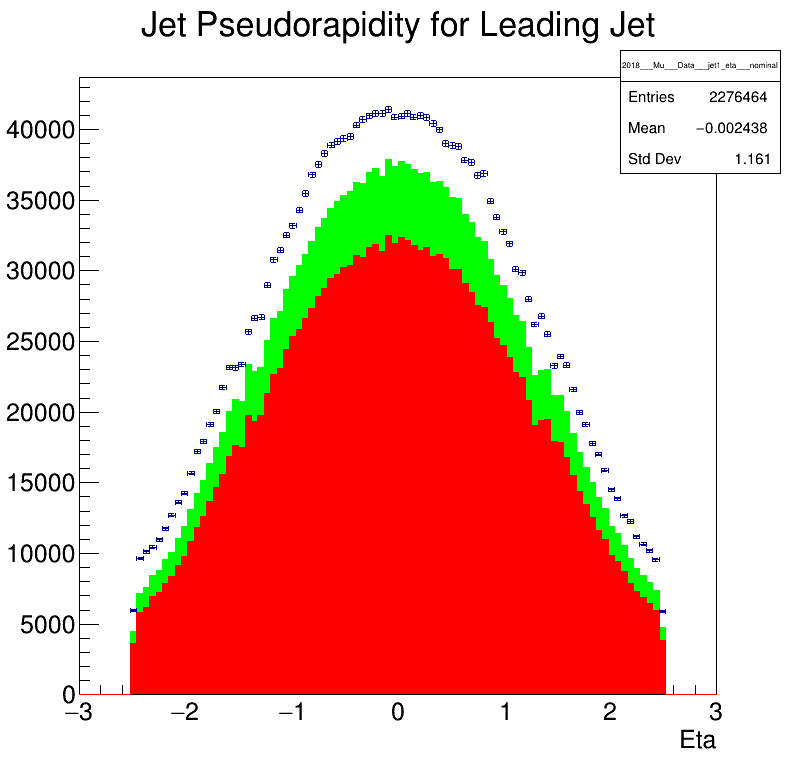

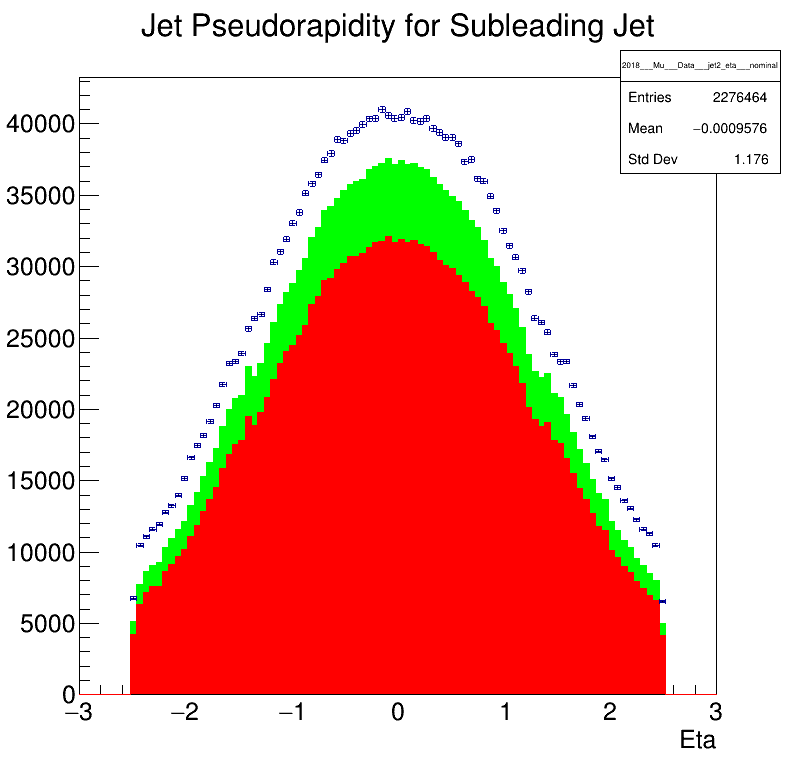

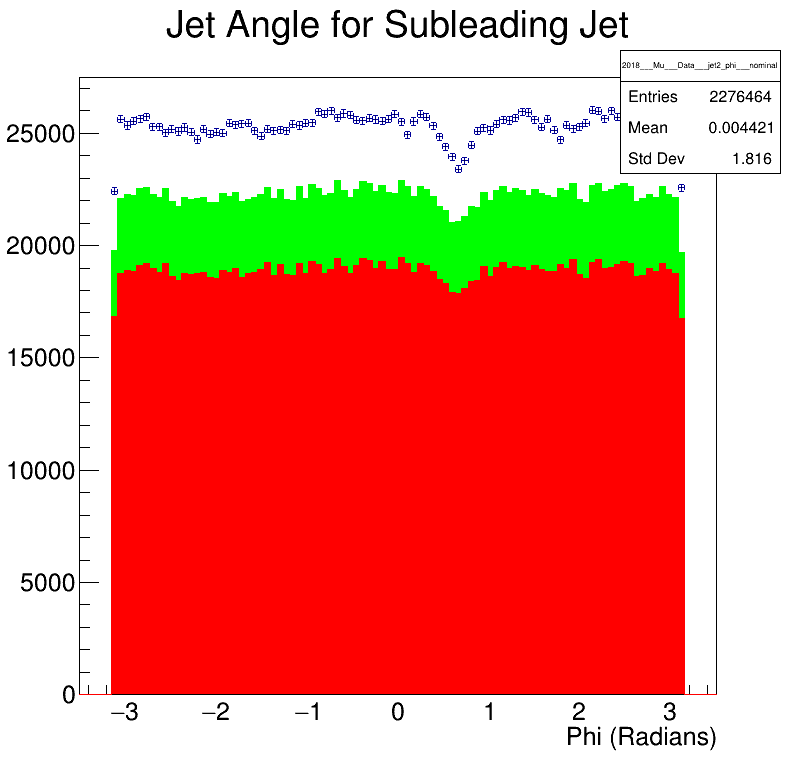

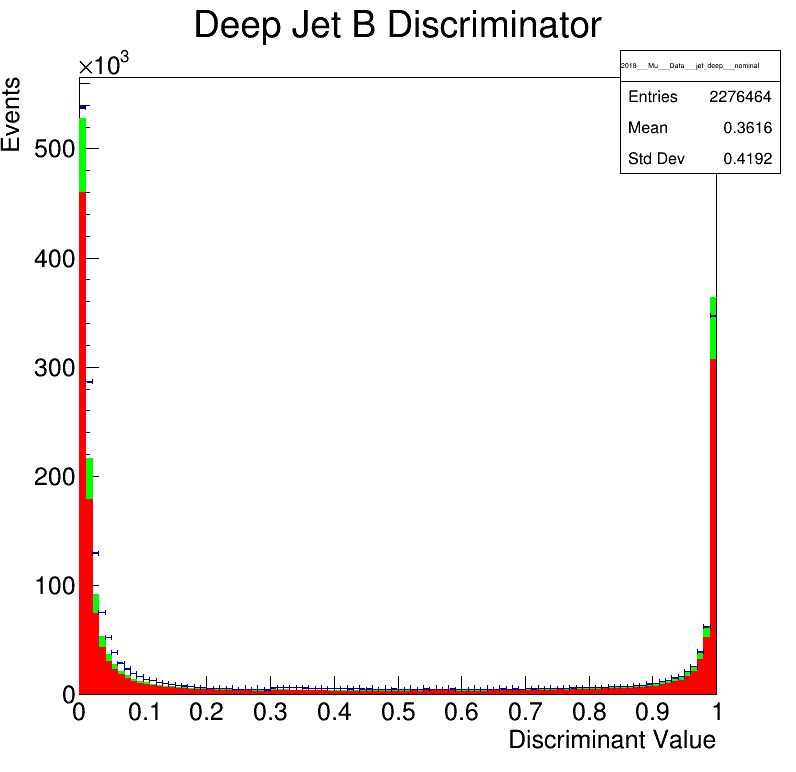

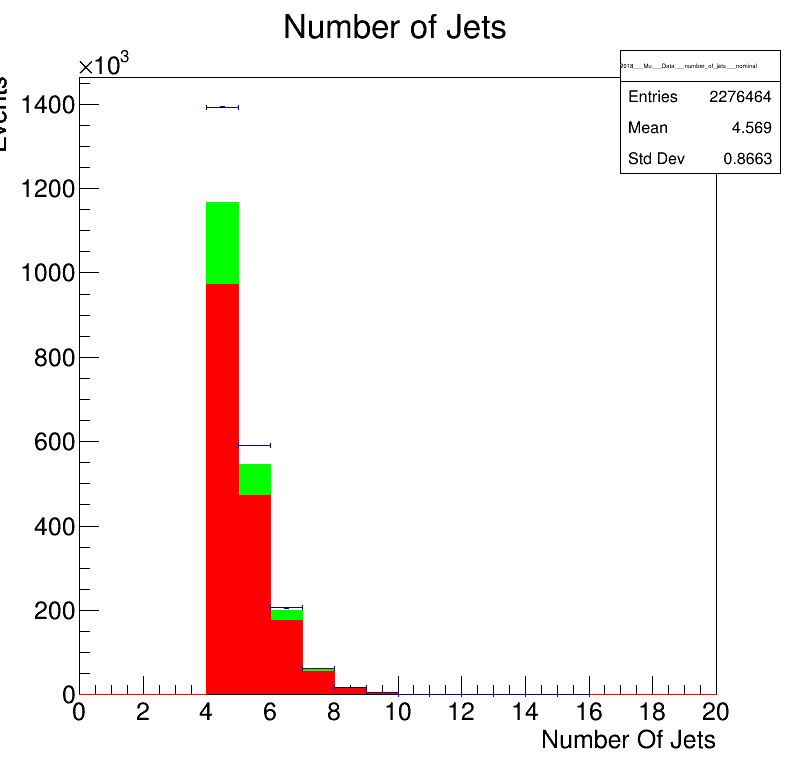

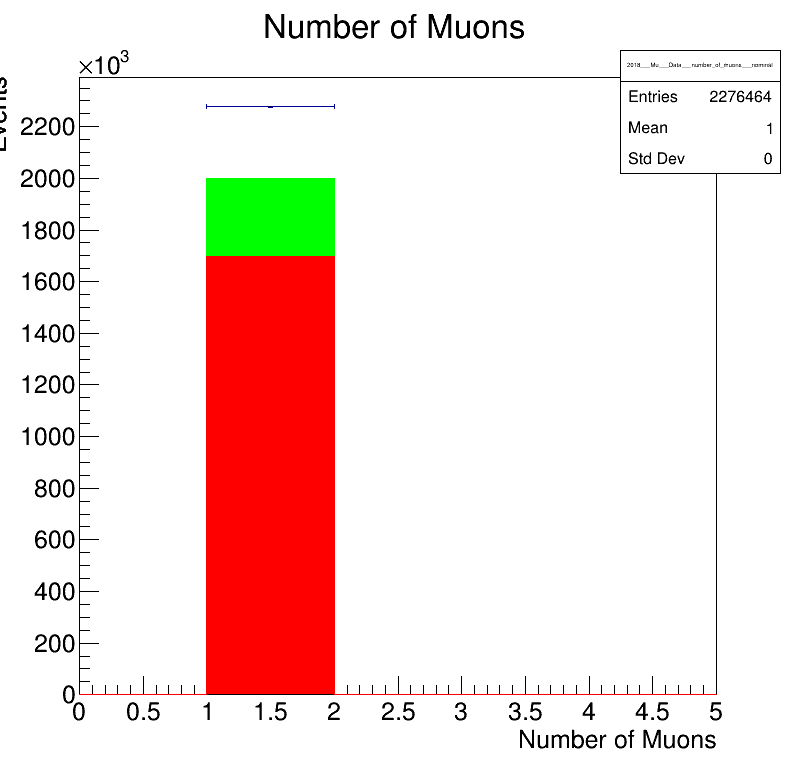

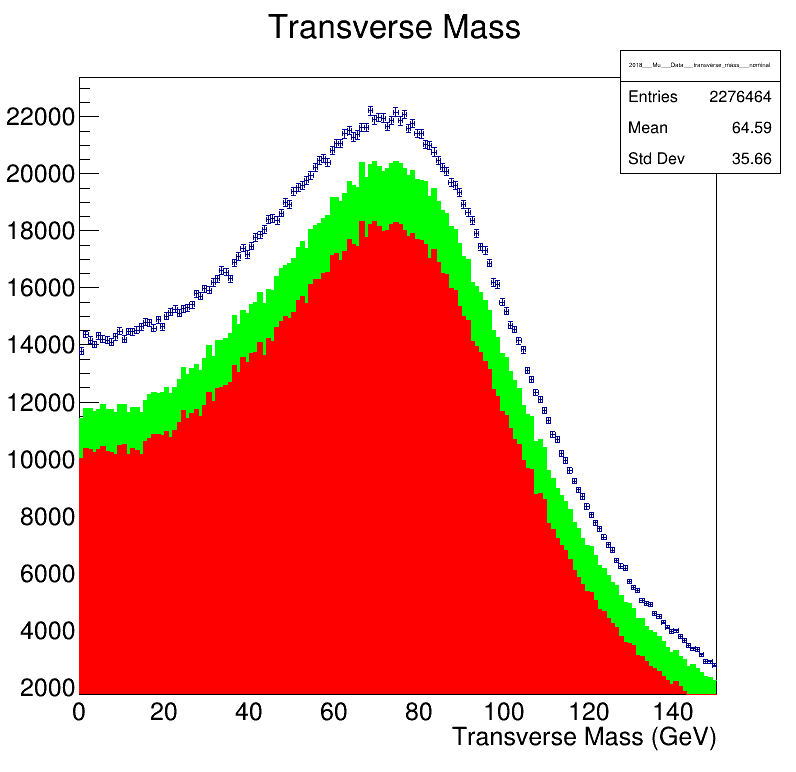

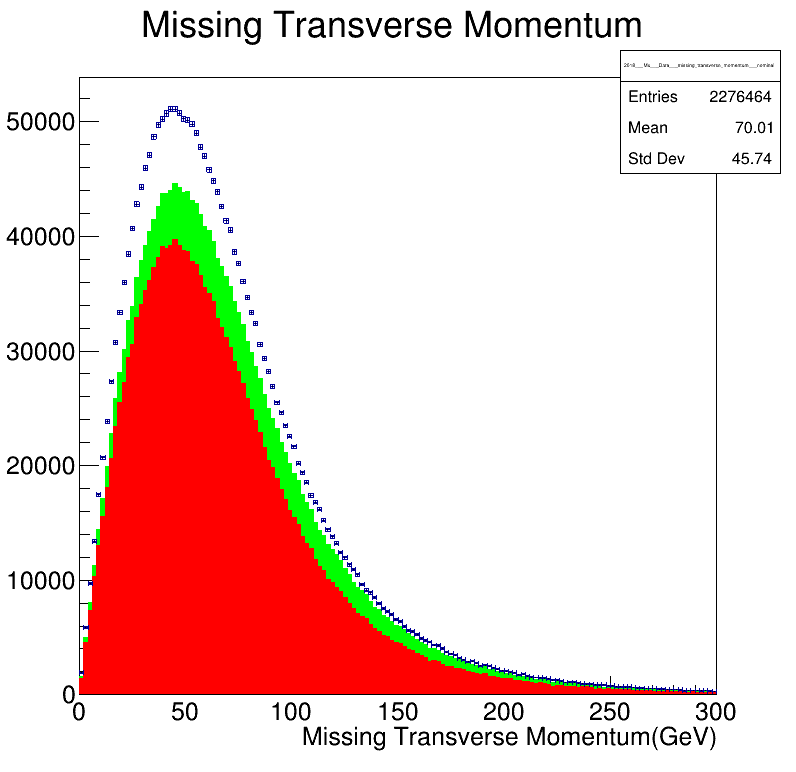

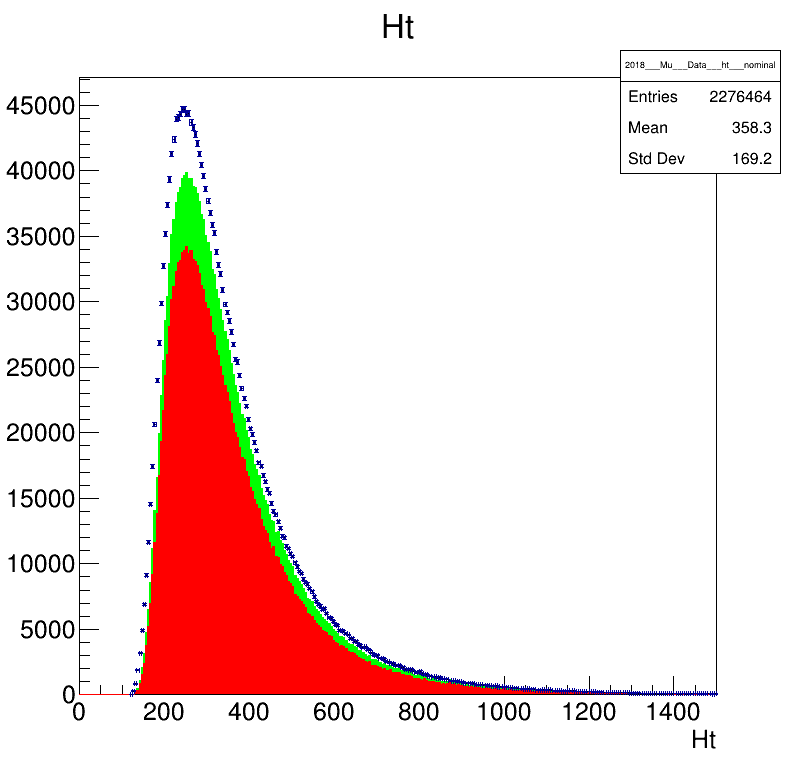

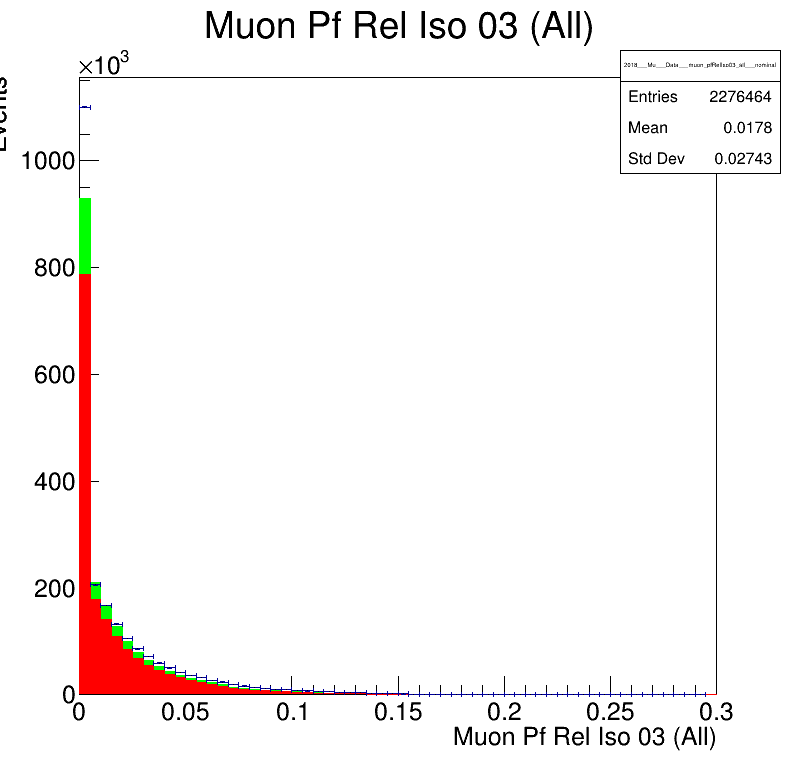

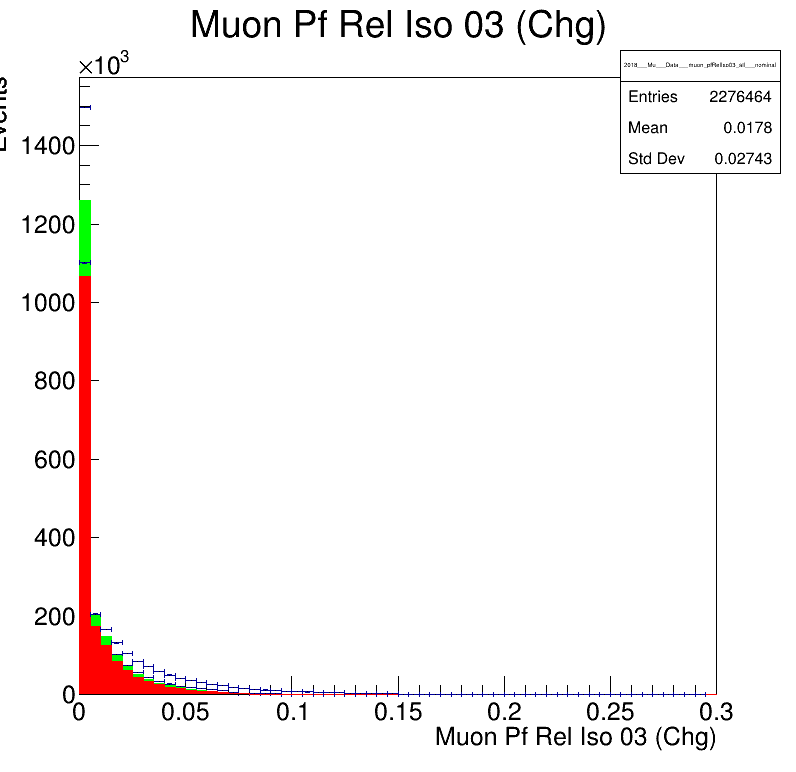

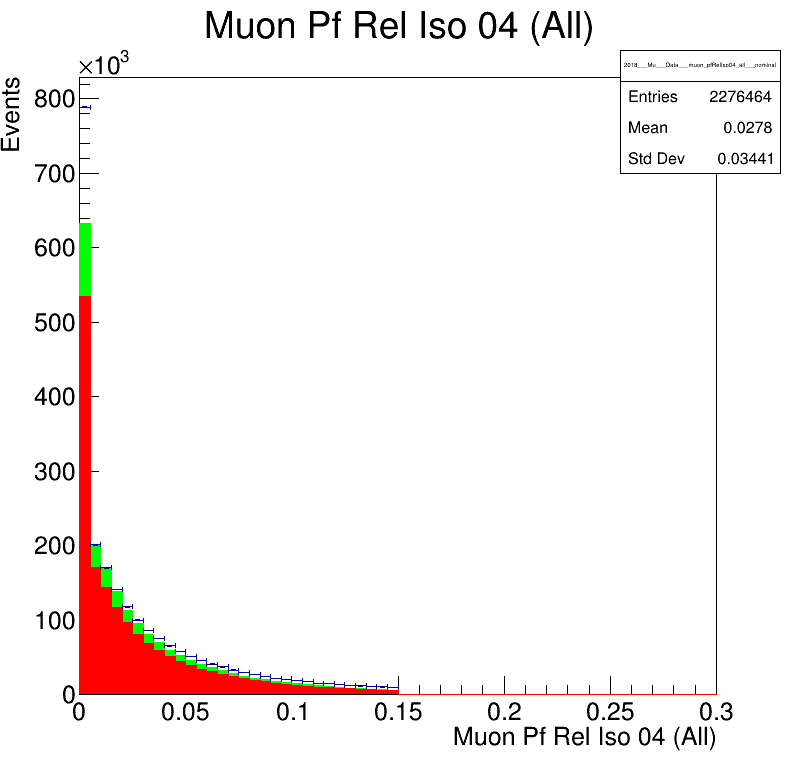

In [9]:
#Load histograms from file(s)
MonteCarlo = dict()
RealData = dict()

MonteCarlo["mu_pt"] = dict()
MonteCarlo["mu_eta"] = dict()
MonteCarlo["mu_phi"] = dict()
MonteCarlo["jet1_pt"] = dict()
MonteCarlo["jet2_pt"] = dict()
MonteCarlo["jet1_eta"] = dict()
MonteCarlo["jet2_eta"] = dict()
MonteCarlo["jet1_phi"] = dict()
MonteCarlo["jet2_phi"] = dict()
MonteCarlo["jet_deep"] = dict()
MonteCarlo["number_of_jets"] = dict()
MonteCarlo["number_of_muons"] = dict()
MonteCarlo["transverse_mass"] = dict()
MonteCarlo["missing_transverse_momentum"] = dict()
MonteCarlo["ht"] = dict()
MonteCarlo["muon_pfRelIso03_all"] = dict()
MonteCarlo["muon_pfRelIso03_chg"] = dict()
MonteCarlo["muon_pfRelIso04_all"] = dict()
MonteCarlo["veto_mu_pt"] = dict()
MonteCarlo["veto_mu_eta"] = dict()
MonteCarlo["veto_mu_phi"] = dict()
MonteCarlo["veto_mu_mass"] = dict()
MonteCarlo["veto_mu_pfRelIso03_all"] = dict()

RealData["mu_pt"] = dict()
RealData["mu_eta"] = dict()
RealData["mu_phi"] = dict()
RealData["jet1_pt"] = dict()
RealData["jet2_pt"] = dict()
RealData["jet1_eta"] = dict()
RealData["jet2_eta"] = dict()
RealData["jet1_phi"] = dict()
RealData["jet2_phi"] = dict()
RealData["jet_deep"] = dict()
RealData["number_of_jets"] = dict()
RealData["number_of_muons"] = dict()
RealData["transverse_mass"] = dict()
RealData["missing_transverse_momentum"] = dict()
RealData["ht"] = dict()
RealData["muon_pfRelIso03_all"] = dict()
RealData["muon_pfRelIso03_chg"] = dict()
RealData["muon_pfRelIso04_all"] = dict()
RealData["veto_mu_pt"] = dict()
RealData["veto_mu_eta"] = dict()
RealData["veto_mu_phi"] = dict()
RealData["veto_mu_mass"] = dict()
RealData["veto_mu_pfRelIso03_all"] = dict()

MonteCarlo["mu_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___mu_pt___nominal")
MonteCarlo["mu_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___mu_pt___nominal")
RealData["mu_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___mu_pt___nominal") 
MonteCarlo["mu_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___mu_eta___nominal")
MonteCarlo["mu_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___mu_eta___nominal")
RealData["mu_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___mu_eta___nominal") 
MonteCarlo["mu_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___mu_phi___nominal")
MonteCarlo["mu_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___mu_phi___nominal")
RealData["mu_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___mu_phi___nominal") 
MonteCarlo["jet1_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___jet1_pt___nominal")
MonteCarlo["jet1_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___jet1_pt___nominal")
RealData["jet1_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet1_pt___nominal") 
MonteCarlo["jet2_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___jet2_pt___nominal")
MonteCarlo["jet2_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___jet2_pt___nominal")
RealData["jet2_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet2_pt___nominal") 
MonteCarlo["jet1_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___jet1_eta___nominal")
MonteCarlo["jet1_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___jet1_eta___nominal")
RealData["jet1_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet1_eta___nominal") 
MonteCarlo["jet2_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___jet2_eta___nominal")
MonteCarlo["jet2_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___jet2_eta___nominal")
RealData["jet2_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet2_eta___nominal") 
MonteCarlo["jet1_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___jet1_phi___nominal")
MonteCarlo["jet1_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___jet1_phi___nominal")
RealData["jet1_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet1_phi___nominal") 
MonteCarlo["jet2_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___jet2_phi___nominal")
MonteCarlo["jet2_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___jet2_phi___nominal")
RealData["jet2_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet2_phi___nominal") 
MonteCarlo["jet_deep"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___jet_deep___nominal")
MonteCarlo["jet_deep"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___jet_deep___nominal")
RealData["jet_deep"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet_deep___nominal") 
MonteCarlo["number_of_jets"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___number_of_jets___nominal")
MonteCarlo["number_of_jets"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___number_of_jets___nominal")
RealData["number_of_jets"]["SingleMuon2018"] = f.Get("2018___Mu___Data___number_of_jets___nominal") 
MonteCarlo["number_of_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___number_of_muons___nominal")
MonteCarlo["number_of_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___number_of_muons___nominal")
RealData["number_of_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___number_of_muons___nominal") 
MonteCarlo["transverse_mass"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___transverse_mass___nominal")
MonteCarlo["transverse_mass"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___transverse_mass___nominal")
RealData["transverse_mass"]["SingleMuon2018"] = f.Get("2018___Mu___Data___transverse_mass___nominal") 
MonteCarlo["missing_transverse_momentum"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___missing_transverse_momentum___nominal")
MonteCarlo["missing_transverse_momentum"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___missing_transverse_momentum___nominal")
RealData["missing_transverse_momentum"]["SingleMuon2018"] = f.Get("2018___Mu___Data___missing_transverse_momentum___nominal")
MonteCarlo["ht"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___ht___nominal")
MonteCarlo["ht"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___ht___nominal")
RealData["ht"]["SingleMuon2018"] = f.Get("2018___Mu___Data___ht___nominal")
MonteCarlo["muon_pfRelIso03_all"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___muon_pfRelIso03_all___nominal")
MonteCarlo["muon_pfRelIso03_all"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___muon_pfRelIso03_all___nominal")
RealData["muon_pfRelIso03_all"]["SingleMuon2018"] = f.Get("2018___Mu___Data___muon_pfRelIso03_all___nominal")
MonteCarlo["muon_pfRelIso03_chg"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___muon_pfRelIso03_chg___nominal")
MonteCarlo["muon_pfRelIso03_chg"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___muon_pfRelIso03_chg___nominal")
RealData["muon_pfRelIso03_chg"]["SingleMuon2018"] = f.Get("2018___Mu___Data___muon_pfRelIso03_chg___nominal")
MonteCarlo["muon_pfRelIso04_all"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___muon_pfRelIso04_all___nominal")
MonteCarlo["muon_pfRelIso04_all"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___muon_pfRelIso04_all___nominal")
RealData["muon_pfRelIso04_all"]["SingleMuon2018"] = f.Get("2018___Mu___Data___muon_pfRelIso04_all___nominal")
MonteCarlo["veto_mu_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___veto_mu_pt___nominal")
MonteCarlo["veto_mu_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___veto_mu_pt___nominal")
RealData["veto_mu_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___veto_mu_pt___nominal") 
MonteCarlo["veto_mu_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___veto_mu_eta___nominal")
MonteCarlo["veto_mu_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___veto_mu_eta___nominal")
RealData["veto_mu_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___veto_mu_eta___nominal")
MonteCarlo["veto_mu_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___veto_mu_phi___nominal")
MonteCarlo["veto_mu_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___veto_mu_phi___nominal")
RealData["veto_mu_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___veto_mu_phi___nominal")
MonteCarlo["veto_mu_mass"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___veto_mu_mass___nominal")
MonteCarlo["veto_mu_mass"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___veto_mu_mass___nominal")
RealData["veto_mu_mass"]["SingleMuon2018"] = f.Get("2018___Mu___Data___veto_mu_mass___nominal")
MonteCarlo["veto_mu_pfRelIso03_all"]["TTToSemiLeptonic"] = f.Get("2018___Mu___TTToSemiLeptonic___veto_mu_pfRelIso03_all___nominal")
MonteCarlo["veto_mu_pfRelIso03_all"]["TTTo2L2Nu"] = f.Get("2018___Mu___TTTo2L2Nu___veto_mu_pfRelIso03_all___nominal")
RealData["veto_mu_pfRelIso03_all"]["SingleMuon2018"] = f.Get("2018___Mu___Data___veto_mu_pfRelIso03_all___nominal") 

S = dict()
S["mu_pt"] = ROOT.THStack("s_mu_pt", "Muon Transverse Momentum;Pt (GeV);Events")
S["mu_eta"] = ROOT.THStack("s_mu_eta", "Muon Pseudorapidity;Eta;Events")
S["mu_phi"] = ROOT.THStack("s_mu_phi", "Muon Angle;Phi (Radians);Events")
S["jet1_pt"] = ROOT.THStack("s_jet1_pt", "Jet Transverse Momentum for Leading Jet;Pt (GeV);Events")
S["jet2_pt"] = ROOT.THStack("s_jet2_pt", "Jet Transverse Momentum for Subleading Jet;Pt (GeV);Events")
S["jet1_eta"] = ROOT.THStack("s_jet1_eta", "Jet Pseudorapidity for Leading Jet;Eta;Events")
S["jet2_eta"] = ROOT.THStack("s_jet2_eta", "Jet Pseudorapidity for Subleading Jet;Eta;Events")
S["jet1_phi"] = ROOT.THStack("s_jet1_phi", "Jet Angle for Leading Jet;Phi (Radians);Events")
S["jet2_phi"] = ROOT.THStack("s_jet2_phi", "Jet Angle for Subleading Jet;Phi (Radians);Events")
S["jet_deep"] = ROOT.THStack("s_jet_deep", "Deep Jet B Discriminator;Discriminant Value;Events")
S["number_of_jets"] = ROOT.THStack("s_number_of_jets", "Number of Jets;Number of Jets;Events")
S["number_of_muons"] = ROOT.THStack("s_number_of_muons", "Number of Muons;Number of Muons;Events")
S["transverse_mass"] = ROOT.THStack("s_transverse_mass", "Transverse Mass;Transverse Mass (GeV);Events")
S["missing_transverse_momentum"] = ROOT.THStack("s_missing_transverse_momentum", "Missing Transverse Momentum;Missing Transverse Momentum (GeV);Events")
S["ht"] = ROOT.THStack("s_ht", "Ht;Ht;Events")
S["muon_pfRelIso03_all"] = ROOT.THStack("s_muon_pfRelIso03_all", "Muon Pf Rel Iso 03 (All);Muon Pf Rel Iso 03 (All);Events")
S["muon_pfRelIso03_chg"] = ROOT.THStack("s_muon_pfRelIso03_chg", "Muon Pf Rel Iso 03 (Chg);Muon Pf Rel Iso 03 (Chg);Events")
S["muon_pfRelIso04_all"] = ROOT.THStack("s_muon_pfRelIso04_all", "Muon Pf Rel Iso 04 (All);Muon Pf Rel Iso 04 (All);Events")
S["veto_mu_pt"] = ROOT.THStack("s_veto_mu_pt", "Transverse Momentum for Vetoed Muons;Pt (GeV);Events")
S["veto_mu_eta"] = ROOT.THStack("s_veto_mu_eta", "Pseudorapidity for Vetoed Muons;Eta;Events")
S["veto_mu_phi"] = ROOT.THStack("s_veto_mu_phi", "Muon Angle for Vetoed Muons;Phi (Radians);Events")
S["veto_mu_mass"] = ROOT.THStack("s_veto_mu_mass", "Transverse Mass for Vetoed Muons;Transverse Mass (GeV);Events")
S["veto_mu_pfRelIso03_all"] = ROOT.THStack("s_veto_mu_pfRelIso03_all", "Muon Pf Rel Iso 03 (All) for Vetoed Muons;Muon Pf Rel Iso 03 (All);Events")

for item in MonteCarlo:
    
    for sample, color in {"TTToSemiLeptonic" : ROOT.kRed, "TTTo2L2Nu" : ROOT.kGreen}.items():
        MonteCarlo[item][sample].SetFillColor(color)
        MonteCarlo[item][sample].SetLineColor(color)
        S[item].Add(MonteCarlo[item][sample])

canvasas = {}

#for outerKey in S.keys():
#    print(S)
#    RealDataMaximum = RealData[key].GetMaximum()
#    MonteCarloMaximum = MonteCarlo[key].GetMaximum()
#    canvasas[key] = ROOT.TCanvas("c_" + key, "", 800, 800)
#    S[key].Draw("HIST S")
#    RealData[key]["SingleMuon2017D"].Draw("PE1 SAME")
#    canvasas[key].BuildLegend()
#    canvasas[key].Draw()

canvas1 = ROOT.TCanvas("c_mu_pt", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["mu_pt"]["SingleMuon2018"].Draw("PE1")
S["mu_pt"].Draw("HIST S SAME")
RealData["mu_pt"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas1.BuildLegend()
canvas1.Draw()
canvasas['0'] = canvas1

canvas2 = ROOT.TCanvas("c_mu_eta", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["mu_eta"]["SingleMuon2018"].Draw("PE1")
S["mu_eta"].Draw("HIST S SAME")
RealData["mu_eta"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas2.BuildLegend()
canvas2.Draw()
canvasas['1'] = canvas2

canvas3 = ROOT.TCanvas("c_mu_phi", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["mu_phi"]["SingleMuon2018"].Draw("PE1")
S["mu_phi"].Draw("HIST S SAME")
RealData["mu_phi"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas3.BuildLegend()
canvas3.Draw()
canvasas['2'] = canvas3

canvas4 = ROOT.TCanvas("c_jet1_pt", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["jet1_pt"]["SingleMuon2018"].Draw("PE1")
S["jet1_pt"].Draw("HIST S SAME")
RealData["jet1_pt"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas4.BuildLegend()
canvas4.Draw()
canvasas['3'] = canvas4

canvas5 = ROOT.TCanvas("c_jet2_pt", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["jet2_pt"]["SingleMuon2018"].Draw("PE1")
S["jet2_pt"].Draw("HIST S SAME")
RealData["jet2_pt"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas5.BuildLegend()
canvas5.Draw()
canvasas['4'] = canvas5

canvas6 = ROOT.TCanvas("c_jet1_eta", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["jet1_eta"]["SingleMuon2018"].Draw("PE1")
S["jet1_eta"].Draw("HIST S SAME")
RealData["jet1_eta"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas6.BuildLegend()
canvas6.Draw()
canvasas['5'] = canvas6

canvas7 = ROOT.TCanvas("c_jet2_eta", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["jet2_eta"]["SingleMuon2018"].Draw("PE1")
S["jet2_eta"].Draw("HIST S SAME")
RealData["jet2_eta"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas7.BuildLegend()
canvas7.Draw()
canvasas['6'] = canvas7

canvas8 = ROOT.TCanvas("c_jet1_phi", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["jet1_phi"]["SingleMuon2018"].Draw("PE1")
S["jet1_phi"].Draw("HIST S SAME")
RealData["jet1_phi"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas8.BuildLegend()
canvas8.Draw
canvasas['7'] = canvas8

canvas9 = ROOT.TCanvas("c_jet2_phi", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["jet2_phi"]["SingleMuon2018"].Draw("PE1")
S["jet2_phi"].Draw("HIST S SAME")
RealData["jet2_phi"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas9.BuildLegend()
canvas9.Draw()
canvasas['8'] = canvas9

canvas10 = ROOT.TCanvas("c_jet_deep", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["jet_deep"]["SingleMuon2018"].Draw("PE1")
S["jet_deep"].Draw("HIST S SAME")
RealData["jet_deep"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas10.BuildLegend()
canvas10.Draw()
canvasas['9'] = canvas10

canvas11 = ROOT.TCanvas("c_number_of_jets", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["number_of_jets"]["SingleMuon2018"].Draw("PE1")
S["number_of_jets"].Draw("HIST S SAME")
RealData["number_of_jets"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas11.BuildLegend()
canvas11.Draw()
canvasas['10'] = canvas11

canvas12 = ROOT.TCanvas("c_number_of_muons", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["number_of_muons"]["SingleMuon2018"].Draw("PE1")
S["number_of_muons"].Draw("HIST S SAME")
RealData["number_of_muons"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas12.BuildLegend()
canvas12.Draw()
canvasas['11'] = canvas12

canvas13 = ROOT.TCanvas("c_transverse_mass", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["transverse_mass"]["SingleMuon2018"].Draw("PE1")
S["transverse_mass"].Draw("HIST S SAME")
RealData["transverse_mass"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas13.BuildLegend()
canvas13.Draw()
canvasas['12'] = canvas13

canvas14 = ROOT.TCanvas("c_missing_transverse_momentum", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["missing_transverse_momentum"]["SingleMuon2018"].Draw("PE1")
S["missing_transverse_momentum"].Draw("HIST S SAME")
RealData["missing_transverse_momentum"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas14.BuildLegend()
canvas14.Draw()
canvasas['13'] = canvas14

canvas15 = ROOT.TCanvas("c_ht", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["ht"]["SingleMuon2018"].Draw("PE1")
S["ht"].Draw("HIST S SAME")
RealData["ht"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas15.BuildLegend()
canvas15.Draw()
canvasas['14'] = canvas15

canvas16 = ROOT.TCanvas("c_muon_pfRelIso03_all", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["muon_pfRelIso03_all"]["SingleMuon2018"].Draw("PE1")
S["muon_pfRelIso03_all"].Draw("HIST S SAME")
RealData["muon_pfRelIso03_all"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas16.BuildLegend()
canvas16.Draw()
canvasas['15'] = canvas16

canvas17 = ROOT.TCanvas("c_muon_pfRelIso03_chg", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["muon_pfRelIso03_chg"]["SingleMuon2018"].Draw("PE1")
S["muon_pfRelIso03_chg"].Draw("HIST S SAME")
RealData["muon_pfRelIso03_all"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas17.BuildLegend()
canvas17.Draw()
canvasas['16'] = canvas17

canvas18 = ROOT.TCanvas("c_muon_pfRelIso04_all", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["muon_pfRelIso04_all"]["SingleMuon2018"].Draw("PE1")
S["muon_pfRelIso04_all"].Draw("HIST S SAME")
RealData["muon_pfRelIso04_all"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas18.BuildLegend()
canvas18.Draw()
canvasas['17'] = canvas18
                                                   
canvas19 = ROOT.TCanvas("c_veto_mu_pt", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["veto_mu_pt"]["SingleMuon2018"].Draw("PE1")
S["veto_mu_pt"].Draw("HIST S SAME")
RealData["veto_mu_pt"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas18.BuildLegend()
canvas19.Draw()
canvasas['18'] = canvas19
                                                   
canvas20 = ROOT.TCanvas("c_veto_mu_eta", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["veto_mu_eta"]["SingleMuon2018"].Draw("PE1")
S["veto_mu_eta"].Draw("HIST S SAME")
RealData["veto_mu_eta"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas18.BuildLegend()
canvas20.Draw()
canvasas['19'] = canvas20
                                                   
canvas21 = ROOT.TCanvas("c_veto_mu_phi", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["veto_mu_phi"]["SingleMuon2018"].Draw("PE1")
S["veto_mu_phi"].Draw("HIST S SAME")
RealData["veto_mu_phi"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas18.BuildLegend()
canvas21.Draw()
canvasas['20'] = canvas21
                                                   
canvas22 = ROOT.TCanvas("c_veto_mu_mass", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["veto_mu_mass"]["SingleMuon2018"].Draw("PE1")
S["veto_mu_mass"].Draw("HIST S SAME")
RealData["veto_mu_mass"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas18.BuildLegend()
canvas22.Draw()
canvasas['21'] = canvas22
                                                   
canvas23 = ROOT.TCanvas("c_veto_mu_pfRelIso03_all", "", 800, 800)
#S["missing_transverse_momentum"].Draw("HIST S")
#RealData["missing_transverse_momentum"]["SingleMuon2017D"].Draw("PE1 SAME")
RealData["veto_mu_pfRelIso03_all"]["SingleMuon2018"].Draw("PE1")
S["veto_mu_pfRelIso03_all"].Draw("HIST S SAME")
RealData["veto_mu_pfRelIso03_all"]["SingleMuon2018"].Draw("PE1 SAME")
#canvas18.BuildLegend()
canvas23.Draw()
canvasas['22'] = canvas23

In [10]:
for kn, k in enumerate(canvasas.keys()):
    
    if kn == 0:
        print("Opening PDF")
        canvasas[k].SaveAs('May11.pdf(')
    
    elif kn == len(canvasas) - 1:
        print("Closing PDF")
        canvasas[k].SaveAs('May11.pdf)')
    
    else:
        canvasas[k].SaveAs('May11.pdf')

Opening PDF
Closing PDF


Info in <TCanvas::Print>: pdf file May11.pdf has been created using the current canvas
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file May11.pdf
Info in <TCanvas

In [ ]:
era = "2017"
channel = "Mu"

def DrawStack(MonteCarlo, Data, separator = "___"):
    era, channel, sample, variable, systematic = list(MonteCarlo.values())[0].GetName().split(separator)
    name = "_".join(["stack", era, channel, variable, systematic])
    colors = {"TTToSemiLeptonic" : ROOT.kRed}
    stack = ROOT.THStack(name, "")
    
    canvas = ROOT.TCanvas(name.replace("stack", "canvas"), "", 800, 800)
  
    
    for sample, hist in MonteCarlo.items():
        hist.SetFillColor(colors.get(sample, ROOT.kMagenta))
        hist.SetLineColor(colors.get(sample, ROOT.kMagenta))
        stack.Add(hist)
        
    aggregate = None
    
    for sample, hist in Data.items():
        if aggregate == None:
            aggregate = hist.Clone(hist.GetName().replace("sample", "allData"))
            
        else:
            aggregate += hist
    
    maxima = []
    minima = []
    maxima.append(stack.GetMaximum())
    maxima.append(aggregate.GetMaximum())
    minima.append(stack.GetMinimum())
    minima.append(aggregate.GetMinimum())
    
    stack.SetMinimum(min(minima))
    stack.SetMaximum(max(maxima))
    
    stack.Draw("HIST S")
    aggregate.Draw("PE1 SAME")
    
    canvas.BuildLegend()
    
    return stack, aggregate, canvas

for kn, variable in enumerate(variables):
        
    MonteCarlo, RealData = GetHistos(f, era, channel, variable)
    
    stack, aggregate, canvas = DrawStack(MonteCarlo, RealData)
       
    if kn == 0:
        print("Opening PDF")
        canvas.SaveAs('December2.pdf(')

    elif kn == len(variables) - 1:
        print("Closing PDF")
        canvas.SaveAs('December2.pdf)')

    else:
        canvas.SaveAs('December2.pdf')
        
    canvas.SaveAs(variable + 'December2.png')

In [ ]:
help(help)